In [ ]:
# Imports
import os
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm.notebook import tqdm
import json
import matplotlib.pyplot as plt

# Constants
DATA_DIR = "/content/drive/MyDrive/Leren_en_Beslissen/data lagersmit/processed data/normalized/"

INPUT_COLUMNS = pd.Index(['averageLeakageRolling', 'averageLeakageCum', 'allowedLeakage', 'AI1', 'AI2', 'AI3', 'TimeElapsed'])
OUTPUT_COLUMNS = pd.Index(['averageLeakageRolling'])
INPUT = 2016
OUTPUT = 2016

TOTAL = INPUT + OUTPUT
INPUT_WIDTH = len(INPUT_COLUMNS)
OUTPUT_WIDTH = len(OUTPUT_COLUMNS)
INPUT_INDICES = [INPUT_COLUMNS.get_loc(output) for output in OUTPUT_COLUMNS]

BATCH_SIZE = 32
N_TRAIN_FILES = 100
FILE_LOOPS = 1

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

timedelta(days=91)/timedelta(minutes=5)

from google.colab import drive
drive.mount('/content/drive')

Device mapping: no known devices.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [ ]:
all_files = [f for f in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, f))]
random.shuffle(all_files)

input_files = {"train": ["copies-60-a_Vessels_Biglift Baffin - 9758557_X23686A - 1 (37 days 23 hours).feather", "copies-60-b_Navig8 Ammolite - 9727534_X24368A - 1 (282 days 10 hours).feather", "copies-60-b_Minerva Lydia - 9262900_X23113A - 2 (52 days 23 hours).feather", "copies-60-b_MV Beatrix - 9419280_X23029A - 2 (38 days 19 hours).feather", "copies-65-b_Marina - 9309497_X23079A - 1 (49 days 18 hours).feather", "copies-60-a_Vessels_MV Gloria - 9382750_X22955A - 7 (36 days 11 hours).feather", "copies-60-b_Surfer Rosa - 9276016_X22995A - 3 (45 days 19 hours).feather", "copies-60-b_Breydel - 9382384_X9367A - 1 (87 days 21 hours).feather", "copies-60-a_Vessels_MV Lemessos Wind - 9516399_X24457A - 1 (79 days 20 hours).feather", "copies-65-a_Vessels_MV Iris - 9285861_X22980A - 1 (28 days 8 hours).feather", "copies-60-b_MV Beatrix - 9419280_X23029A - 1 (74 days 12 hours).feather", "copies-60-b_Breydel - 9382384_X9366A - 1 (54 days 17 hours).feather", "copies-60-a_Vessels_MV Beatrix - 9419280_X23029A_tmp - 1 (74 days 12 hours).feather", "copies-60-a_Vessels_MV Beatrix - 9419280_X23029A - 1 (74 days 12 hours).feather", "copies-65-a_Vessels_La Datcha - 9849021_X23251A - 1 (55 days 7 hours).feather", "copies-65-b_BBC Yukon - 9357999 - 1 (27 days 7 hours).feather", "copies-65-b_MV Beatrix - 9419280_X23029A - 2 (38 days 19 hours).feather", "copies-60-a_Breydel_SB 16-09-2020 - 1 (54 days 17 hours).feather", "copies-65-a_Vessels_MV Beatrix - 9419280_X23029A - 2 (38 days 19 hours).feather", "copies-60-a_Vessels_Seaboxer III - 9436070_X23931A - 1 (28 days 23 hours).feather", "copies-70-b_Pallieter - 9279123_X22105A - 1 (103 days 4 hours).feather", "copies-60-a_Vessels_Balticborg - 9267716_X22948A - 1 (117 days 18 hours).feather", "copies-65-b_Minerva Lydia - 9262900_X23113A - 4 (28 days 19 hours).feather", "copies-65-b_Minerva Lydia - 9262900_X23113A - 1 (34 days 5 hours).feather", "copies-60-a_Seaboxer III_STERN TUBE DATA LOGGER_V60 - 1 (28 days 23 hours).feather", "copies-60-b_Seaboxer III - 9436070_X23931A - 4 (34 days 17 hours).feather", "copies-65-a_Vessels_MV Lydia - 9262900_X23113A - 1 (34 days 5 hours).feather", "copies-60-b_BBC Yukon - 9357999 - 4 (29 days 9 hours).feather", "copies-60-b_Balticborg - 9267716_X22948A - 1 (117 days 18 hours).feather", "copies-70-b_Marina - 9309497_X23079A - 1 (49 days 18 hours).feather", "copies-65-a_Vessels_MV Beatrix - 9419280_X23029A - 1 (74 days 12 hours).feather", "copies-65-a_Vessels_EDDYSTONE - 9234070_X21092A - 1 (35 days 15 hours).feather", "copies-65-a_Vessels_La Datcha - 9849021_X23251A - 3 (37 days 13 hours).feather", "copies-60-a_Vessels_La Datcha - 9849021_X23251A - 3 (37 days 13 hours).feather", "copies-65-b_La Datcha - 9849021_X23251A - 1 (55 days 7 hours).feather", "copies-60-b_Surfer Rosa - 9276016_X22995A - 2 (110 days 19 hours).feather", "copies-60-b_MFV Scombrus - 9828936_X21653A - 1 (57 days 2 hours).feather", "copies-60-a_Vessels_MV Martine - 9411537_X22842A - 2 (53 days 2 hours).feather", "copies-60-a_Breydel_PS 16-09-2020_60 - 1 (87 days 21 hours).feather", "copies-60-b_BBC Yukon - 9357999 - 1 (27 days 7 hours).feather", "copies-60-b_Minerva Gloria - 9382750_X22955A - 7 (61 days 14 hours).feather", "copies-65-b_La Datcha - 9849021_X23251A - 4 (42 days 2 hours).feather", "copies-60-a_Breydel_PS Data logging Ventus - 1 (87 days 21 hours).feather", "copies-60-a_Vessels_Marina - 9309497_X23079A - 1 (97 days 2 hours).feather", "copies-60-b_Minerva Lydia - 9262900_X23113A - 4 (28 days 19 hours).feather", "copies-60-a_Vessels_MV Beatrix - 9419280_X23029A - 2 (38 days 19 hours).feather", "copies-60-b_MV Iris - 9285861_X22980A - 1 (28 days 8 hours).feather", "copies-60-a_meuse river ps_PS - 11-9_Laatste 3 portside - 1 (85 days 15 hours).feather", "copies-65-b_Minerva Lydia - 9262900_X23113A - 2 (52 days 23 hours).feather", "copies-65-a_Vessels_MV Gloria - 9382750_X22955A - 7 (36 days 11 hours).feather", "copies-65-a_Vessels_MV Martine - 9411537_X22842A - 3 (50 days 9 hours).feather", "copies-60-b_MV Beatrix - 9419280_X23029A_tmp - 1 (74 days 12 hours).feather", "copies-60-a_Vessels_Marina - 9309497_X23079A - 2 (115 days 21 hours).feather", "copies-60-a_Vessels_Surfer Rosa - 9276016_X22995A - 2 (110 days 19 hours).feather", "copies-65-b_MV Beatrix - 9419280_X23029A_tmp - 1 (74 days 12 hours).feather", "copies-60-a_Vessels_La Datcha - 9849021_X23251A - 1 (55 days 7 hours).feather", "copies-65-a_Vessels_MV Martine - 9411537_X22842A - 2 (53 days 2 hours).feather", "copies-60-a_Vessels_EDDYSTONE - 9234070_X21092A - 4 (42 days 19 hours).feather", "copies-60-a_meuse river sb_SB -11-9_Laatste 3 read-outs - 1 (85 days 15 hours).feather", "copies-60-a_Vessels_MV Lydia - 9262900_X23113A - 1 (34 days 5 hours).feather", "copies-65-b_EDDYSTONE - 9234070_X21092A - 1 (35 days 15 hours).feather"], "val": ["copies-60-a_Balticborg 29-6-2020_60 - 1 (117 days 18 hours).feather", "copies-60-a_Vessels_MV Maxima - 9882061_X23865A - 1 (92 days 0 hours).feather", "copies-60-a_Vessels_MV Iris - 9285861_X22980A - 1 (28 days 8 hours).feather", "copies-60-b_MV Lemessos Wind - 9516399_X24457A - 1 (79 days 20 hours).feather", "copies-60-b_Minerva Lydia - 9262900_X23113A - 1 (34 days 5 hours).feather", "copies-65-b_Minerva Gloria - 9382750_X22955A - 7 (61 days 14 hours).feather", "copies-60-a_Vessels_Seaboxer III - 9436070_X23931A - 4 (34 days 17 hours).feather", "copies-60-b_EDDYSTONE - 9234070_X21092A - 4 (42 days 19 hours).feather", "copies-60-a_Vessels_Breydel - 9382384_X9367A - 1 (87 days 21 hours).feather", "copies-60-b_Biglift Baffin - 9758557_X23686A - 1 (37 days 23 hours).feather", "copies-65-b_BBC Yukon - 9357999 - 4 (29 days 9 hours).feather", "copies-65-b_La Datcha - 9849021_X23251A - 3 (42 days 20 hours).feather"], "test": ["copies-65-b_MV Iris - 9285861_X22980A - 1 (28 days 8 hours).feather", "copies-60-a_Vessels_MV Martine - 9411537_X22842A - 3 (50 days 9 hours).feather", "copies-65-b_MV Beatrix - 9419280_X23029A - 1 (74 days 12 hours).feather", "copies-60-a_Vessels_Breydel - 9382384_X9366A - 1 (54 days 17 hours).feather", "copies-60-b_MV Maxima - 9882061_X23865A - 1 (92 days 0 hours).feather", "copies-60-b_Seaboxer III - 9436070_X23931A - 1 (28 days 23 hours).feather", "copies-60-a_Vessels_Surfer Rosa - 9276016_X22995A - 3 (45 days 19 hours).feather"]}

train_list = []
test_list = []
val_list = []

total_list = input_files["train"] + input_files["val"] + input_files["test"]

for file in total_list:
  df = pd.read_feather(DATA_DIR + file)[INPUT_COLUMNS]
  if file in input_files["train"]:
    train_list.append((file, df))
  elif file in input_files["val"]:
    val_list.append((file, df))
  elif file in input_files["test"]:
    test_list.append((file, df))


# for file in all_files:
#   df = pd.read_feather(DATA_DIR + file)[INPUT_COLUMNS]
#   if len(df.index) >= INPUT + OUTPUT:
#     if len(test_list) < 0.1*len(train_list):
#       test_list.append((file, df))
#     elif len(val_list) < 0.2*len(train_list):
#       val_list.append((file, df))
#     else:
#       train_list.append((file, df))
#   else:
#     print(f'file {file} is to small.')
  
#   if len(train_list) >= N_TRAIN_FILES and len(val_list) >= 1 and len(test_list) >= 1:
#     break

print(f'\ntraining files: {len(train_list)}\t validation files: {len(val_list)}\t test files: {len(test_list)}')


training files: 61	 validation files: 12	 test files: 7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Windows

In [ ]:
def split_window(features):
  inputs = features[:, slice(0, INPUT), :]
  labels = tf.stack([features[:, slice(INPUT, None), i] for i in INPUT_INDICES], axis=-1)
  # if self.label_columns is not None:
  #   labels = tf.stack(
  #       [labels[:, :, self.column_indices[name]] for name in self.label_columns],
  #       axis=-1)
  inputs.set_shape([None, INPUT, None])
  labels.set_shape([None, OUTPUT, None])

  return inputs, labels

def to_window(data):
  data = np.array(data, dtype=np.float32)
  window = keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=TOTAL,
      batch_size=BATCH_SIZE)
  
  splitted_window = window.map(split_window)

  return splitted_window

# Model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Leren_en_Beslissen/models/2016-2016: 3 epochs (2022-01-31 16:48:07.819017)')

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2016, 7)]         0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                5120      
                                                                 
 dense_1 (Dense)             (None, 2016)              66528     
                                                                 
 reshape_1 (Reshape)         (None, 2016, 1)           0         
                                                                 
Total params: 71,648
Trainable params: 71,648
Non-trainable params: 0
_________________________________________________________________


  0%|          | 0/7 [00:00<?, ?it/s]

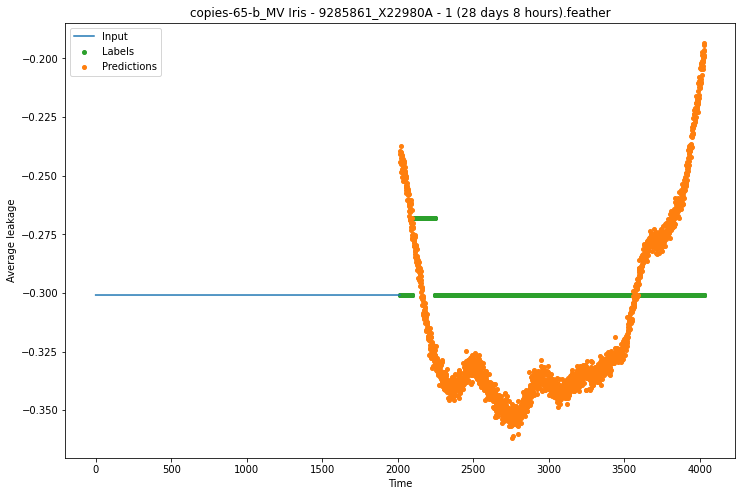

copies-65-b_MV Iris - 9285861_X22980A - 1 (28 days 8 hours).feather,0.001624376280233264


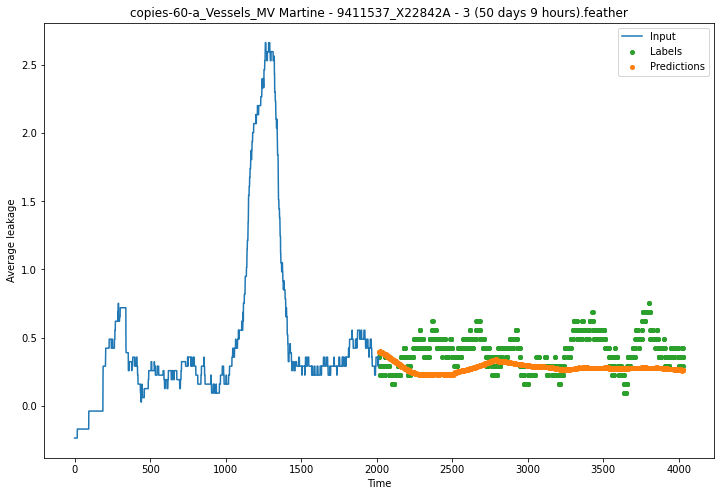

copies-60-a_Vessels_MV Martine - 9411537_X22842A - 3 (50 days 9 hours).feather,0.02982867695391178


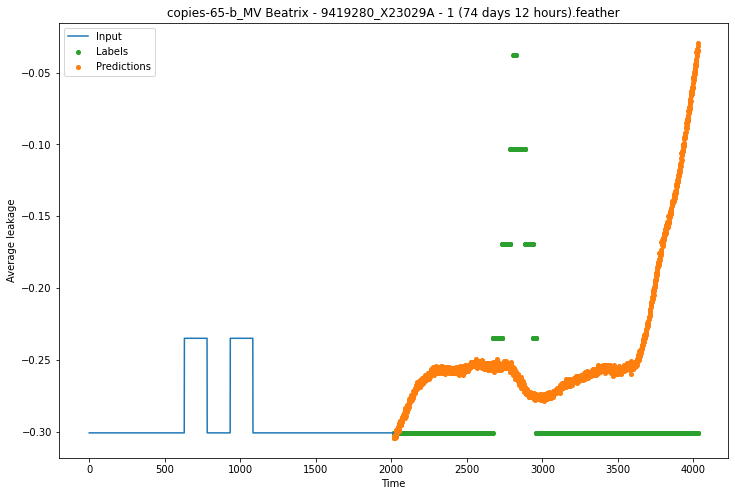

copies-65-b_MV Beatrix - 9419280_X23029A - 1 (74 days 12 hours).feather,0.00811119843274355


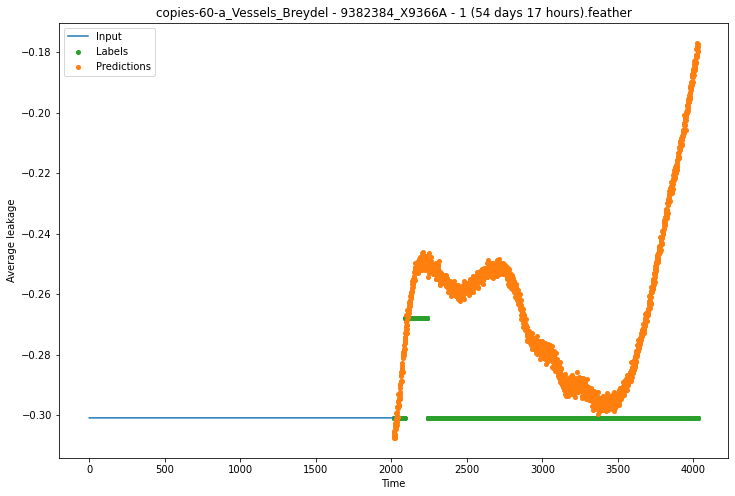

copies-60-a_Vessels_Breydel - 9382384_X9366A - 1 (54 days 17 hours).feather,0.0019145377445966005


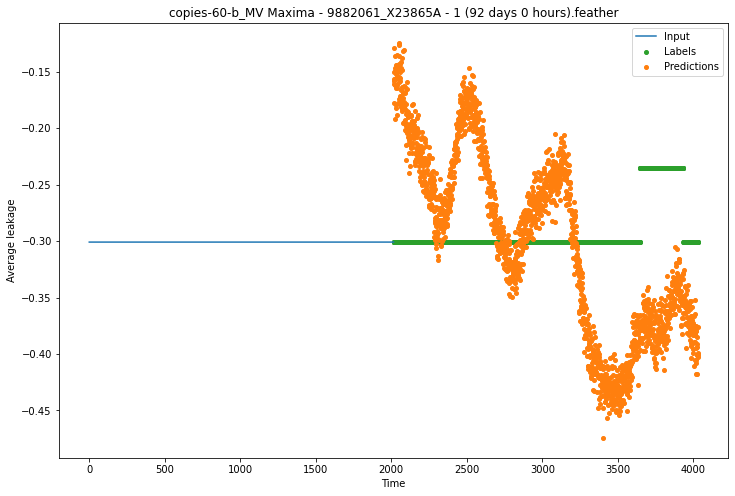

copies-60-b_MV Maxima - 9882061_X23865A - 1 (92 days 0 hours).feather,0.008363042958080769


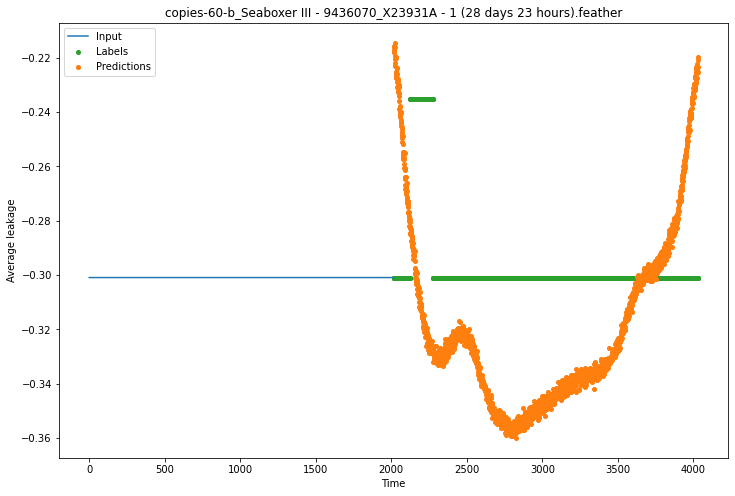

copies-60-b_Seaboxer III - 9436070_X23931A - 1 (28 days 23 hours).feather,0.001819795579649508


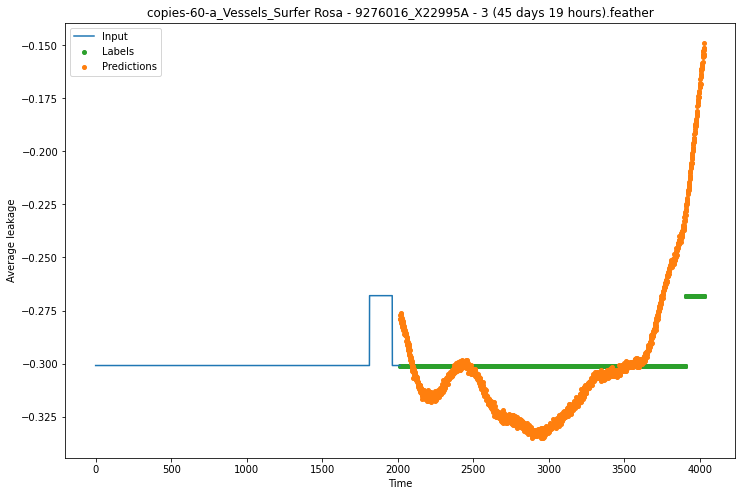

copies-60-a_Vessels_Surfer Rosa - 9276016_X22995A - 3 (45 days 19 hours).feather,0.0008819894283078611


In [ ]:
def try_model(window):
  batch = next(iter(window))

  input = tf.stack([batch[0][:, :, i] for i in INPUT_INDICES], axis=-1)
  expected = batch[1]
  prediction = model(batch[0])

  # print("input shape:", input.shape)
  # print("expected shape:", expected.shape)
  # print("predictions shape:", prediction.shape)

  return input, expected, prediction


def plot(window, file):
  input, expected, prediction = try_model(test_window)

  plt.figure(figsize=(12, 8))

  in_x = range(0, INPUT)
  input_y = input[0, :, :]

  out_x = range(INPUT, TOTAL)
  exp_y = expected[0, :, :]
  pred_y = prediction[0, :, :]

  plt.plot(in_x, input_y, label="Input")
  plt.scatter(out_x, exp_y, marker='.', label='Labels', c='#2ca02c', s=64)
  plt.scatter(out_x, pred_y, marker='.', label='Predictions', c='#ff7f0e', s=64)

  plt.title(file)
  plt.xlabel("Time")
  plt.ylabel("Average leakage")
  plt.legend()

  plt.show()

  mse = tf.keras.losses.MeanSquaredError()
  MSE = mse(exp_y, pred_y).numpy()
  print(f"{file},{MSE}")


  # return exp_y, pred_y

for test_file, test_df in tqdm(test_list):
  test_window = to_window(test_df)

  plot(test_window, test_file)